<a href="https://colab.research.google.com/github/corleonesado/SadettinEr_DSA210_FallProject/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install pandas numpy seaborn matplotlib scipy

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, classification_report
)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.svm import SVC


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ff_path = "/content/drive/MyDrive/forexfactory_with_pct_change.csv"
crypto_path = "/content/drive/MyDrive/final_crypto_news.csv"

ff = pd.read_csv(ff_path)
crypto = pd.read_csv(crypto_path)
print(ff.shape, crypto.shape)

(261, 12) (474, 7)


In [ ]:
def parse_forex_value(x):
    if pd.isna(x):
        return np.nan

    x = str(x).strip()

    if x in ["", "N/A", "NA", "nan"]:
        return np.nan

    multiplier = 1.0

    if x.endswith("%"):
        x = x.replace("%", "")
        multiplier = 1.0
    elif x.endswith("K"):
        x = x.replace("K", "")
        multiplier = 1_000.0
    elif x.endswith("M"):
        x = x.replace("M", "")
        multiplier = 1_000_000.0

    try:
        return float(x) * multiplier
    except:
        return np.nan


In [ ]:
forex_numeric_cols = ["actual", "forecast", "previous", "pct_change"]

for col in forex_numeric_cols:
    ff[col] = ff[col].apply(parse_forex_value)

ff = ff.dropna(subset=forex_numeric_cols + ["price_before"]).reset_index(drop=True)

print(ff[forex_numeric_cols].dtypes)


actual        float64
forecast      float64
previous      float64
pct_change    float64
dtype: object


In [ ]:
X_ff = ff[["actual", "forecast", "previous", "price_before"]].astype(float)
y_ff = ff["pct_change"].astype(float)

assert X_ff.dtypes.apply(lambda x: x != "object").all()
assert y_ff.dtype != "object"


In [ ]:
Xff_train, Xff_test, yff_train, yff_test = train_test_split(
    X_ff, y_ff, test_size=0.2, shuffle=False
)


In [ ]:
lr = LinearRegression()
lr.fit(Xff_train, yff_train)

pred_lr = lr.predict(Xff_test)

print("FOREX — Linear Regression")
print("MSE:", mean_squared_error(yff_test, pred_lr))
print("R²:", r2_score(yff_test, pred_lr))


FOREX — Linear Regression
MSE: 0.02184723452403003
R²: -0.1639983456893075


In [ ]:
rf_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=6,
    random_state=42
)

rf_reg.fit(Xff_train, yff_train)
pred_rf = rf_reg.predict(Xff_test)

print("\nFOREX — Random Forest")
print("MSE:", mean_squared_error(yff_test, pred_rf))
print("R²:", r2_score(yff_test, pred_rf))



FOREX — Random Forest
MSE: 0.022741391196640474
R²: -0.2116381001195915


In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(Xff_train, yff_train)
pred_gbr = gbr.predict(Xff_test)

print("\nFOREX — Gradient Boosting")
print("MSE:", mean_squared_error(yff_test, pred_gbr))
print("R²:", r2_score(yff_test, pred_gbr))



FOREX — Gradient Boosting
MSE: 0.02070895853925265
R²: -0.10335216359420474


In [ ]:
crypto = crypto.dropna().reset_index(drop=True)

crypto["direction"] = (crypto["pct_change"] > 0).astype(int)

X_crypto = crypto[["5m_before", "5m_after"]].astype(float)
y_crypto = crypto["direction"].astype(int)


In [ ]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_crypto, y_crypto, test_size=0.2, shuffle=False
)


In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xc_train, yc_train)

pred_log = logreg.predict(Xc_test)

print("\nCRYPTO — Logistic Regression")
print("Accuracy:", accuracy_score(yc_test, pred_log))
print(classification_report(yc_test, pred_log))



CRYPTO — Logistic Regression
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.89      1.00      0.94        42

    accuracy                           0.95        95
   macro avg       0.95      0.95      0.95        95
weighted avg       0.95      0.95      0.95        95



In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42
)

rf_clf.fit(Xc_train, yc_train)
pred_rf = rf_clf.predict(Xc_test)

print("\nCRYPTO — Random Forest")
print("Accuracy:", accuracy_score(yc_test, pred_rf))
print(classification_report(yc_test, pred_rf))



CRYPTO — Random Forest
Accuracy: 0.49473684210526314
              precision    recall  f1-score   support

           0       0.59      0.30      0.40        53
           1       0.46      0.74      0.56        42

    accuracy                           0.49        95
   macro avg       0.52      0.52      0.48        95
weighted avg       0.53      0.49      0.47        95



In [ ]:
svm = SVC(kernel="rbf", C=1.0)
svm.fit(Xc_train, yc_train)

pred_svm = svm.predict(Xc_test)

print("\nCRYPTO — SVM")
print("Accuracy:", accuracy_score(yc_test, pred_svm))
print(classification_report(yc_test, pred_svm))



CRYPTO — SVM
Accuracy: 0.4421052631578947
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.44      1.00      0.61        42

    accuracy                           0.44        95
   macro avg       0.22      0.50      0.31        95
weighted avg       0.20      0.44      0.27        95



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-106244018.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


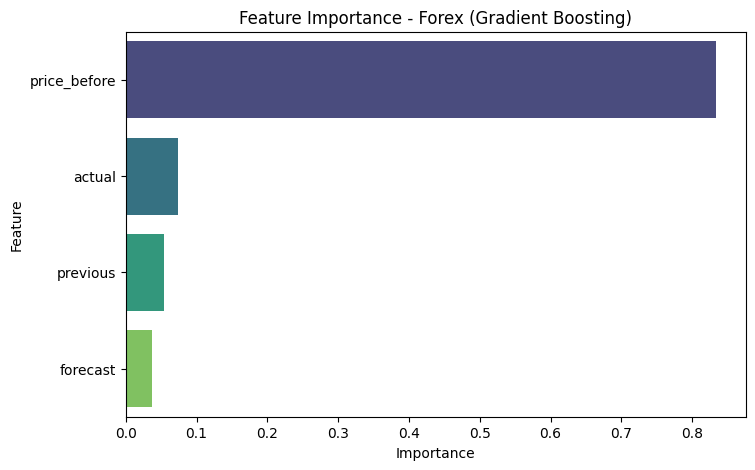

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(
    gbr.feature_importances_,
    index=X_ff.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Forex (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


/tmp/ipython-input-4209531408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_c.values, y=feat_imp_c.index, palette="magma")


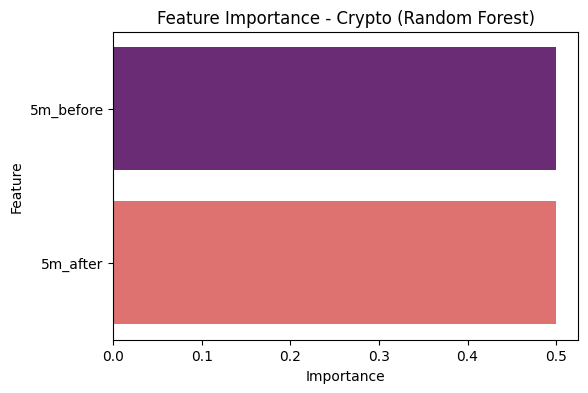

In [ ]:
feat_imp_c = pd.Series(
    rf_clf.feature_importances_,
    index=X_crypto.columns
).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp_c.values, y=feat_imp_c.index, palette="magma")
plt.title("Feature Importance - Crypto (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


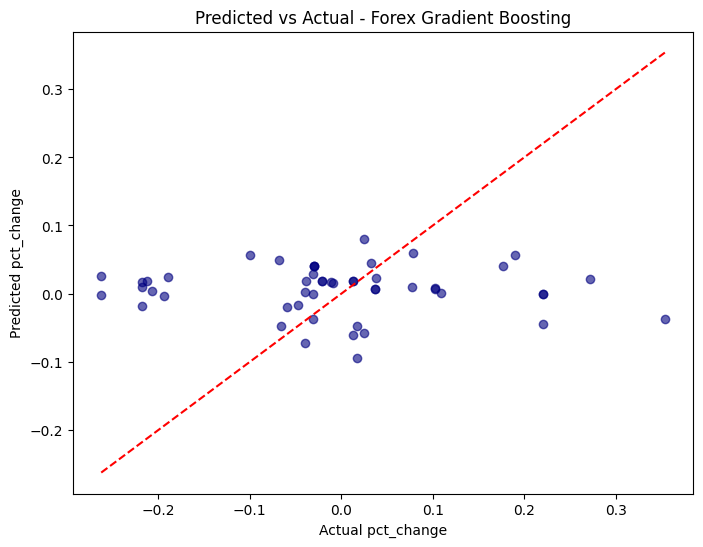

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(yff_test, pred_gbr, alpha=0.6, color="navy")
plt.plot([yff_test.min(), yff_test.max()], [yff_test.min(), yff_test.max()], 'r--')
plt.title("Predicted vs Actual - Forex Gradient Boosting")
plt.xlabel("Actual pct_change")
plt.ylabel("Predicted pct_change")
plt.show()


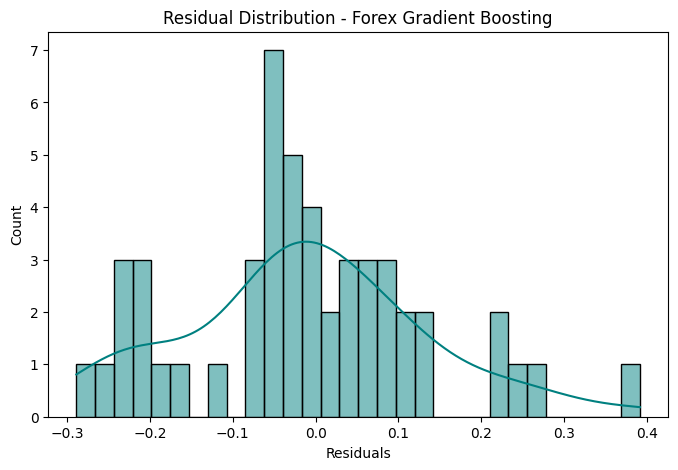

In [ ]:
residuals = yff_test - pred_gbr
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color="teal")
plt.title("Residual Distribution - Forex Gradient Boosting")
plt.xlabel("Residuals")
plt.show()


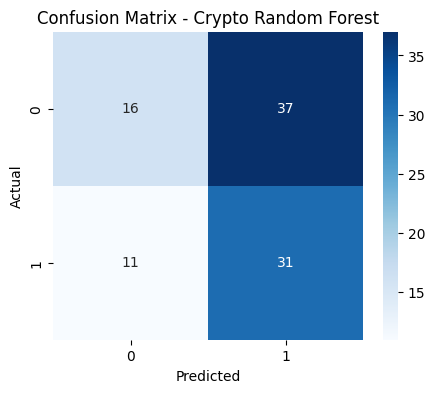

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yc_test, pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Crypto Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-2881560508.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="Set2")


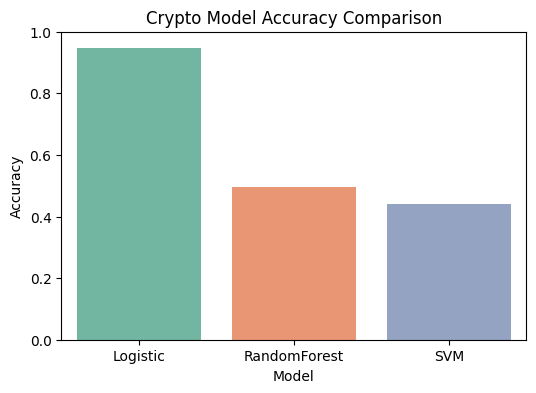

In [ ]:
acc_log = accuracy_score(yc_test, pred_log)
acc_rf = accuracy_score(yc_test, pred_rf)
acc_svm = accuracy_score(yc_test, pred_svm)

acc_df = pd.DataFrame({
    "Model": ["Logistic", "RandomForest", "SVM"],
    "Accuracy": [acc_log, acc_rf, acc_svm]
})

plt.figure(figsize=(6,4))
sns.barplot(x="Model", y="Accuracy", data=acc_df, palette="Set2")
plt.title("Crypto Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()


In [ ]:
pred_lr = lr.predict(Xff_test)

pred_rf = rf_reg.predict(Xff_test)

pred_gbr = gbr.predict(Xff_test)

print(len(yff_test), len(pred_lr), len(pred_rf), len(pred_gbr))


50 50 50 50


In [ ]:
mse_lr = mean_squared_error(yff_test, pred_lr)
r2_lr = r2_score(yff_test, pred_lr)

mse_rf = mean_squared_error(yff_test, pred_rf)
r2_rf = r2_score(yff_test, pred_rf)

mse_gb = mean_squared_error(yff_test, pred_gbr)
r2_gb = r2_score(yff_test, pred_gbr)


In [ ]:
reg_df = pd.DataFrame({
    "Model": ["Linear", "RandomForest", "GradientBoosting"],
    "R2": [r2_lr, r2_rf, r2_gb],
    "MSE": [mse_lr, mse_rf, mse_gb]
})

reg_df


,Model,R2,MSE
0,Linear,-0.163998,0.021847
1,RandomForest,-0.211638,0.022741
2,GradientBoosting,-0.103352,0.020709


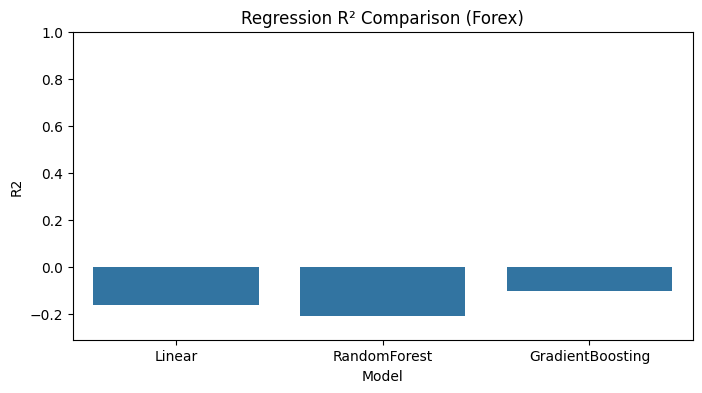

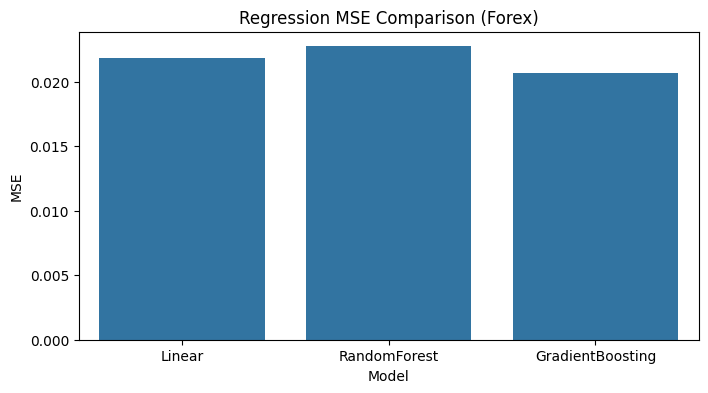

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="R2", data=reg_df)
plt.title("Regression R² Comparison (Forex)")
plt.ylim(reg_df["R2"].min() - 0.1, 1)
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="MSE", data=reg_df)
plt.title("Regression MSE Comparison (Forex)")
plt.show()


/tmp/ipython-input-3115657590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=crypto["direction"], palette="pastel")


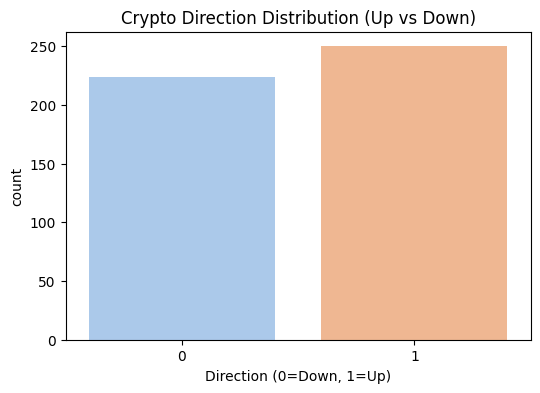

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=crypto["direction"], palette="pastel")
plt.title("Crypto Direction Distribution (Up vs Down)")
plt.xlabel("Direction (0=Down, 1=Up)")
plt.show()
